In [58]:
import pandas as pd 
data = pd.read_excel("data/Mall Customers.xlsx")
df = data.copy()
df.head()


,CustomerID,Gender,Age,Education,Marital Status,Annual Income (k$),Spending Score (1-100)
0,1,M,19,High School,Married,15,39
1,2,M,21,Graduate,Single,15,81
2,3,F,20,Graduate,Married,16,6
3,4,F,23,High School,Unknown,16,77
4,5,F,31,Uneducated,Married,17,40


In [59]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Education               200 non-null    object
 4   Marital Status          200 non-null    object
 5   Annual Income (k$)      200 non-null    int64 
 6   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 11.1+ KB


Dans ce dataset, nous avons au total 200 observations, 7 colonnes à raisons de 3 colonnes catégorielles et 4 colonnes numériques. 
aucune colonnes ne contient de valeurs manquantes.

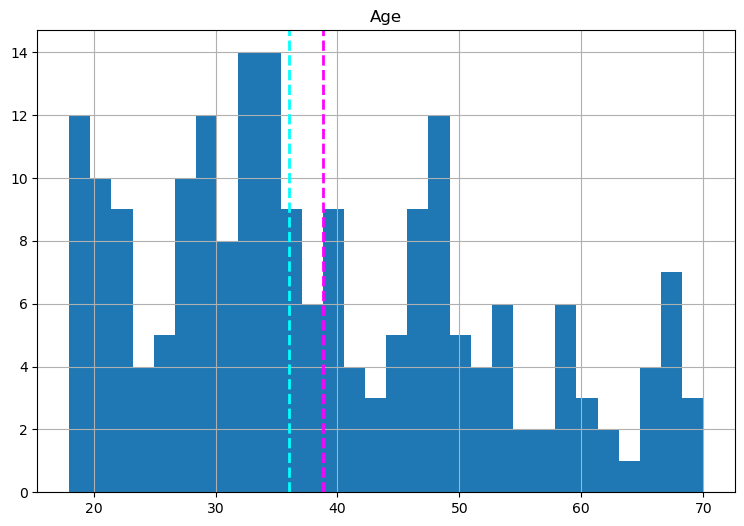

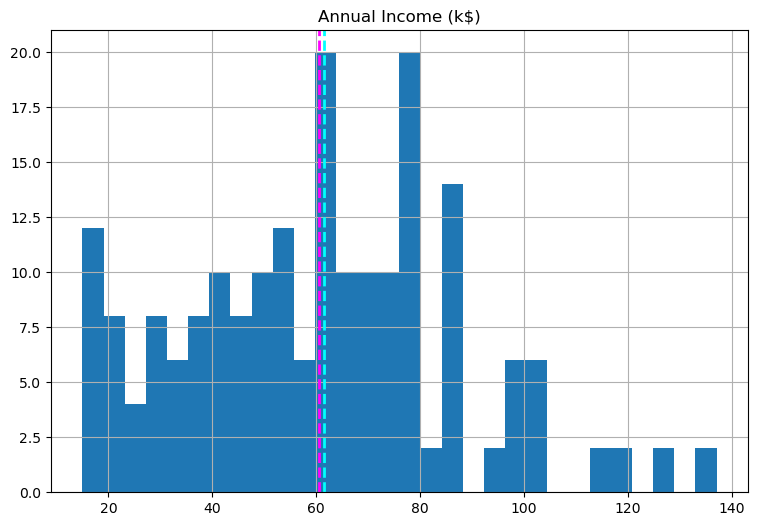

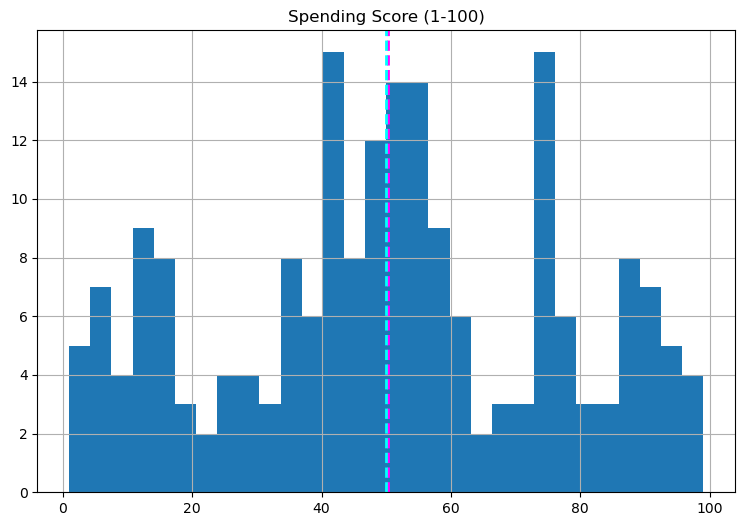

In [61]:
import matplotlib.pyplot as plt
numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=30, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)

In [62]:
skew_value = df[numeric_features].skew()
print(f"coefficient d'assymétrie:\n {skew_value}" )

coefficient d'assymétrie:
 Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64


les coefficients d'assymétries ainsi calculer nous indiquent que l'écart entre la moyenne et la médiane de chacune des colonnes est négligeabe, par conséquent, les variables suivent une distribution à peu près symétrique. Ainsi, une normalisation StandardScaler est la plus appropriée. 

In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
df = df.drop(columns='CustomerID', errors='ignore')
df.columns = df.columns.str.strip()
categorial_features = ['Gender', 'Education', 'Marital Status']

numrical_transform = Pipeline([
    ('scaler', StandardScaler())
])

categorial_transform = Pipeline([
    ('encoding', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

preprocessor = ColumnTransformer([
    ('numerical', numrical_transform, numeric_features),
    ('categorial', categorial_transform, categorial_features)
])

#scaled_features = StandardScaler().fit_transform(numeric_features)




In [69]:
from sklearn.decomposition import PCA

full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('pca', PCA(n_components=2))
])


x_2d = full_pipeline.fit_transform(df)

print(f"Ancienne forme : {df.shape}")
print(f"Nouvelle forme : {x_2d.shape}")


Ancienne forme : (200, 6)
Nouvelle forme : (200, 2)


Text(0, 0.5, 'Composante Principale 2')

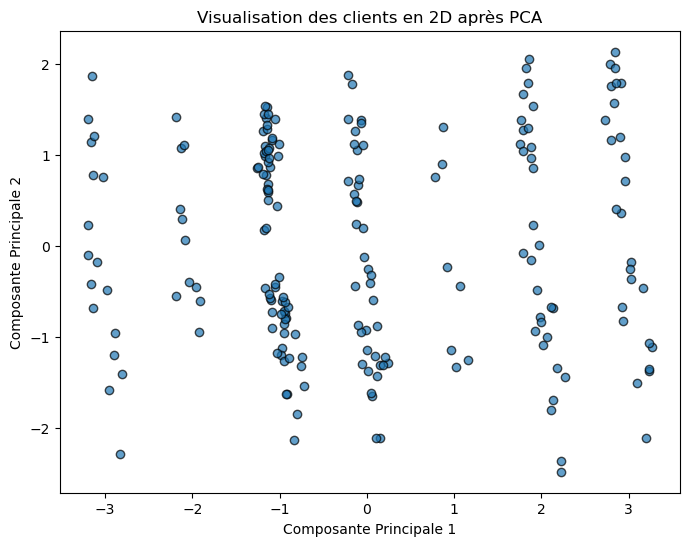

In [76]:
plt.figure(figsize=(8,6))
plt.scatter(x_2d[:, 0], x_2d[:, 1], alpha=0.7, edgecolors='k')
plt.title("Visualisation des clients en 2D après PCA")
plt.xlabel("Composante Principale 1")
plt.ylabel("Composante Principale 2")